In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#import data
df = yf.download('^GSPC', start = '2022-01-01', end = '2025-09-20')
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))
df = df.dropna()
df

/tmp/ipykernel_247/1147940809.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('^GSPC', start = '2022-01-01', end = '2025-09-20')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Price,Close,High,Low,Open,Volume,returns
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2022-01-04,4793.540039,4818.620117,4774.270020,4804.509766,4683170000,-0.000630
2022-01-05,4700.580078,4797.700195,4699.439941,4787.990234,4887960000,-0.019583
2022-01-06,4696.049805,4725.009766,4671.259766,4693.390137,4295280000,-0.000964
2022-01-07,4677.029785,4707.950195,4662.740234,4697.660156,4181510000,-0.004058
2022-01-10,4670.290039,4673.020020,4582.240234,4655.339844,4511810000,-0.001442
...,...,...,...,...,...,...
2025-09-15,6615.279785,6619.620117,6602.069824,6603.490234,5045020000,0.004696
2025-09-16,6606.759766,6626.990234,6600.109863,6624.129883,5359510000,-0.001289


In [3]:
#EWMA Function
def ewma_volatility(returns, lamda=0.94):
    var = np.zeros_like(returns)
    var[0] = returns.var()  
    for t in range(1, len(returns)):
        var[t] = lamda * var[t-1] + (1 - lamda) * returns[t-1]**2
    vol = np.sqrt(var)
    return vol

In [4]:
#Compute EWMA volatility
lamda = 0.94
df['ewma_vol'] = ewma_volatility(df['returns'].values, lamda)

df['predicted_vol_next'] = df['ewma_vol'].shift(1) #forcast next day vol

df['realized_vol_next'] = np.abs(df['returns']) #realized next day vol
df = df.dropna()
df

Price,Close,High,Low,Open,Volume,returns,ewma_vol,predicted_vol_next,realized_vol_next
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,
Date,,,,,,,,,
2022-01-05,4700.580078,4797.700195,4699.439941,4787.990234,4887960000,-0.019583,0.011083,0.011430,0.019583
2022-01-06,4696.049805,4725.009766,4671.259766,4693.390137,4295280000,-0.000964,0.011768,0.011083,0.000964
2022-01-07,4677.029785,4707.950195,4662.740234,4697.660156,4181510000,-0.004058,0.011412,0.011768,0.004058
2022-01-10,4670.290039,4673.020020,4582.240234,4655.339844,4511810000,-0.001442,0.011108,0.011412,0.001442
2022-01-11,4713.069824,4714.129883,4638.270020,4669.140137,4101590000,0.009118,0.010776,0.011108,0.009118
...,...,...,...,...,...,...,...,...,...
2025-09-15,6615.279785,6619.620117,6602.069824,6603.490234,5045020000,0.004696,0.005955,0.006141,0.004696
2025-09-16,6606.759766,6626.990234,6600.109863,6624.129883,5359510000,-0.001289,0.005887,0.005955,0.001289


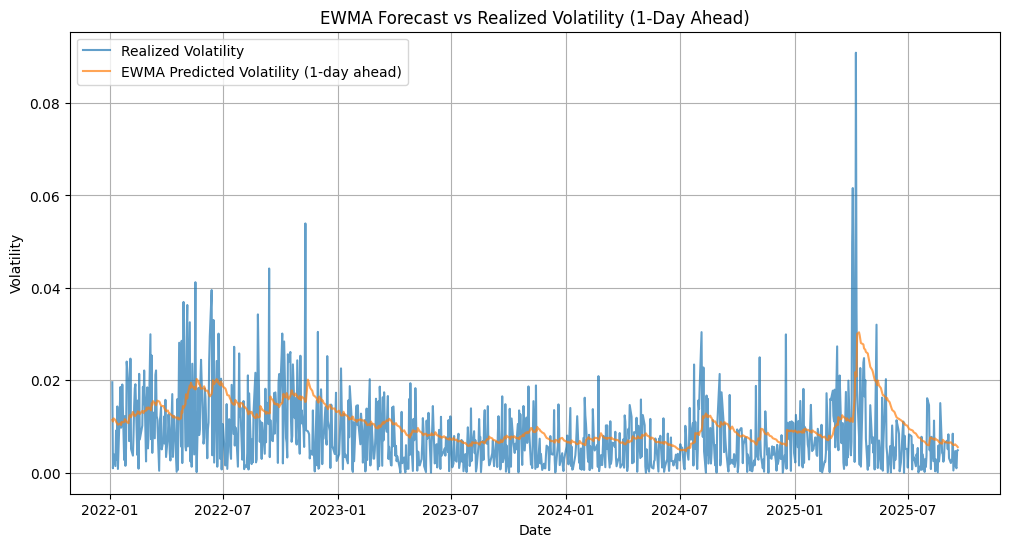

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['realized_vol_next'], label='Realized Volatility', alpha=0.7)
plt.plot(df.index, df['predicted_vol_next'], label='EWMA Predicted Volatility (1-day ahead)', alpha=0.7)
plt.title('EWMA Forecast vs Realized Volatility (1-Day Ahead)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()